In [7]:
import sys
import librosa  # python package for music and audio analysis
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

## Carga do arquivo de áudio

In [47]:
SOUND_DIR = 'mp3/megarynchus_pitangua/Megarynchus269765.mp3'

# Load the mp3 file
signal, sr = librosa.load(SOUND_DIR, duration=10) # sr = sampling rate

/dados/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [48]:
signal[:10]

array([-0.01791369, -0.04421782, -0.01024855,  0.04302266,  0.04492928,
        0.00172405, -0.03676264, -0.03727475,  0.00762971,  0.04785536],
      dtype=float32)

In [49]:
sr

22050

In [50]:
# listen to the recording
ipd.display(ipd.Audio(SOUND_DIR))

## Gráfico monofônico

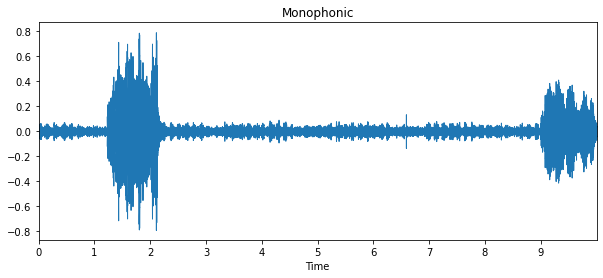

In [51]:
# plot recording signal
plt.figure(figsize=(10, 4))
librosa.display.waveplot(signal, sr=sr)
plt.title('Monophonic')
plt.show()

## Funções de transformação

Convert an amplitude spectrogram to dB-scaled spectrogram:

`librosa.amplitude_to_db(S, ref=1.0, amin=1e-05, top_db=80.0)`


Short-time Fourier transform (STFT):

`librosa.stft(
    y,
    n_fft=2048,
    hop_length=None,
    win_length=None,
    window='hann',
    center=True,
    dtype=None,
    pad_mode='reflect',
)`


Convert a power spectrogram (amplitude squared) to decibel (dB) units:

`librosa.power_to_db(S, ref=1.0, amin=1e-10, top_db=80.0)`


Compute a mel-scaled spectrogram:

`librosa.feature.melspectrogram(
    y=None,
    sr=22050,
    S=None,
    n_fft=2048,
    hop_length=512,
    win_length=None,
    window='hann',
    center=True,
    pad_mode='reflect',
    power=2.0,
    **kwargs,
)`


In [52]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
S = librosa.feature.melspectrogram(y=signal,
                                   sr=sr,
                                   n_fft=1024,
                                   hop_length=1024,
                                   n_mels=128,
                                   htk=True,
                                   fmin=1400,
                                   fmax=sr/2)
Sdb = librosa.power_to_db(S ** 2, ref=np.max)

In [61]:
#?librosa.amplitude_to_db
#?librosa.stft
#?librosa.feature.melspectrogram
#?librosa.power_to_db

In [53]:
print("signal:", signal[:10])
print("\nD:", D[:10])
print("\nS:", S[:10])
print("\nSdb:", Sdb[:10])

signal: [-0.01791369 -0.04421782 -0.01024855  0.04302266  0.04492928  0.00172405
 -0.03676264 -0.03727475  0.00762971  0.04785536]

D: [[-69.09691  -74.830475 -80.       ... -80.       -80.       -71.772644]
 [-69.22923  -75.4097   -80.       ... -80.       -80.       -72.2283  ]
 [-69.332306 -75.35487  -80.       ... -80.       -80.       -72.8228  ]
 ...
 [-68.684906 -74.69414  -80.       ... -80.       -80.       -73.89335 ]
 [-68.54082  -74.565735 -80.       ... -80.       -80.       -71.86113 ]
 [-68.39026  -74.414856 -80.       ... -80.       -80.       -71.70002 ]]

S: [[5.93319128e-04 1.74953515e-04 2.51481717e-04 ... 6.05287775e-03
  1.45410770e-04 1.38219178e-03]
 [3.20748053e-03 3.05102265e-04 1.99490110e-04 ... 3.11648678e-02
  5.12863742e-04 1.13542425e-03]
 [5.86177781e-03 1.42575940e-04 7.76151952e-04 ... 3.89620811e-02
  3.26763955e-03 2.56618182e-03]
 ...
 [2.82306108e-04 3.88043758e-04 4.77552181e-04 ... 1.99755225e-02
  4.24925983e-03 8.33502156e-04]
 [2.64354399e-04

## Espectrograma Mel

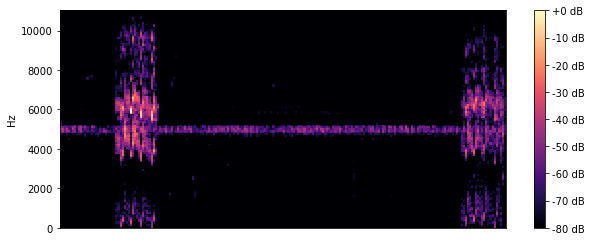

In [54]:
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

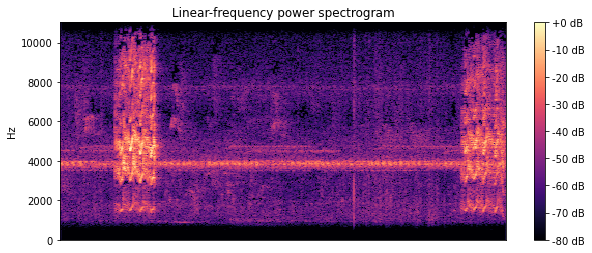

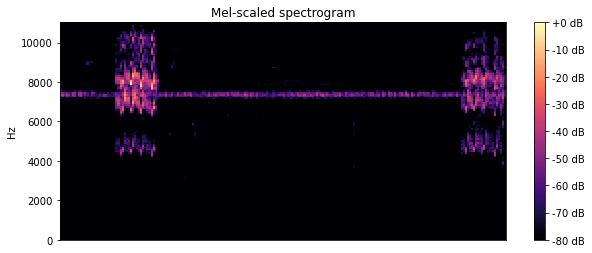

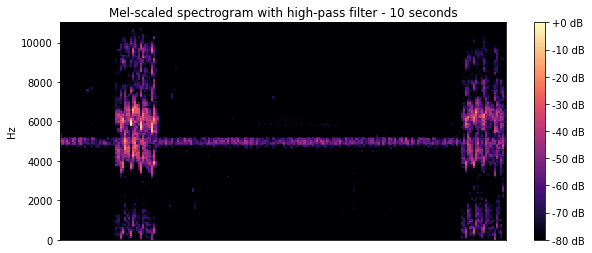

In [55]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 0 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
plt.show()